In [678]:
import numpy as np

from matplotlib  import pyplot as plt

from sklearn.pipeline import Pipeline 
from sklearn.linear_model import SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.base import clone

In [679]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)


y.shape

(100, 1)

<function matplotlib.pyplot.show(close=None, block=None)>

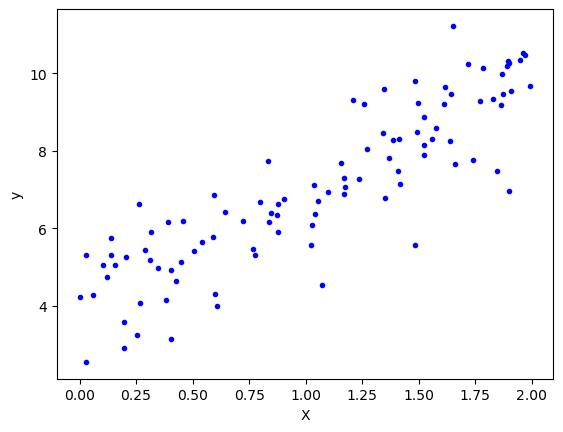

In [680]:
plt.plot(X, y, "b.")
plt.ylabel('y')
plt.xlabel('X')
plt.show

In [681]:
X_b = np.c_[np.ones((100, 1)), X]
# print(X_b.shape)
# print(X_b)
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.92368123],
       [2.9694292 ]])

In [682]:
# predicting
X_new = np.array([[0, 2]]).T

# print(X_new)
X_new_b = np.c_[np.ones((2, 1)), X_new]
print(X_new_b)
y_predict = X_new_b.dot(theta_best) 
y_predict

[[1. 0.]
 [1. 2.]]


array([[3.92368123],
       [9.86253963]])

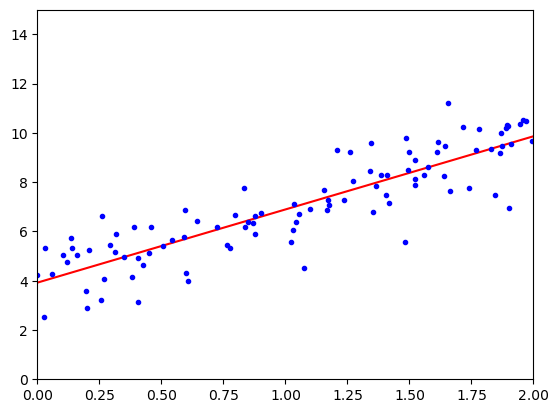

In [683]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

#### using scikit-learn

In [684]:
lin_req = LinearRegression()
lin_req.fit(X=X, y=y)

lin_req.intercept_, lin_req.coef_

(array([3.92368123]), array([[2.9694292]]))

In [685]:

lin_req.predict(X_new)

array([[3.92368123],
       [9.86253963]])

In [686]:
#  The LinearRegression class is based on the scipy.linalg.lstsq() function (the
#  name stands for “least squares”), which you could call directly:

theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.92368123],
       [2.9694292 ]])

In [687]:
# using the pseudoinverse (Moore-Penrose) method

theta_best_pseu =  np.linalg.pinv(X_b).dot(y)
theta_best_pseu

# The pseudoinverse itself is computed using a standard matrix factorization technique
#  called Singular Value Decomposition (SVD) that can decompose the training set
#  matrix X into the matrix multiplication of three matrices U Σ V⊺ (see
#  Σ+
#  numpy.linalg.svd()). The pseudoinverse is computed as X+ = VΣ+U⊺. To compute
#  the matrix 
# , the algorithm takes Σ and sets to zero all values smaller than a tiny
#  threshold value, then it replaces all the nonzero values with their inverse, and finally
#  it transposes the resulting matrix. This approach is more efficient than computing the
#  Normal Equation, plus it handles edge cases nicely: indeed, the Normal Equation may
#  not work if the matrix X⊺X is not invertible (i.e., singular), such as if m < n or if some
#  features are redundant, but the pseudoinverse is always defined.

array([[3.92368123],
       [2.9694292 ]])

##### Batch Gradient Descent

In [688]:
eta = 0.1

n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta* gradients

In [689]:
theta

# that’s exactly what the Normal Equation found! Gradient Descent worked per
# fectly. But what if you had used a different learning rate eta?

array([[3.92368123],
       [2.9694292 ]])

##### Stochastic Gradient Descent

 The main problem with Batch Gradient Descent is the fact that it uses the whole
 training set to compute the gradients at every step, which makes it very slow when
 the training set is large. At the opposite extreme, Stochastic Gradient Descent picks a
 random instance in the training set at every step and computes the gradients based
 only on that single instance.

 On the other hand, due to its stochastic (i.e., random) nature, this algorithm is much
 less regular than Batch Gradient Descent: instead of gently decreasing until it reaches
 the minimum, the cost function will bounce up and down, decreasing only on aver
age. Over time it will end up very close to the minimum, but once it gets there it will
 continue to bounce around, never settling down

On the other hand.. When the cost function is very irregular (as in Figure 4-6), this can actually help the
 algorithm jump out of local minima, so Stochastic Gradient Descent has a better
 chance of finding the global minimum than Batch Gradient Descent does.

 Therefore, randomness is good to escape from local optima, but bad because it means
 that the algorithm can never settle at the minimum. One solution to this dilemma is
 to gradually reduce the learning rate. 

In [690]:
n_epochs = 50
t0, t1 = 5, 50  # learning rate hyperparameters


def learning_schedule(t):
    return t0 / (t + t1)


theta = np.random.randn(2, 1)  # randome initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index: random_index+1]
        yi = y[random_index: random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta * gradients

theta


# While the Batch Gradient Descent code iterated 1,000 times through the whole train
# ing set, this code goes through the training set only 50 times and reaches a pretty
#  good solution

array([[3.95338472],
       [2.96449053]])

In [691]:
# on using scikit-learn

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([3.93904167]), array([2.98249941]))

##### Mini-batch Gradient Descent

 The last Gradient Descent algorithm we will look at is called Mini-batch Gradient
 Descent. It is simple to understand once you know Batch and Stochastic Gradient
 Descent: at each step, instead of computing the gradients based on the full training set
 (as in Batch GD) or based on just one instance (as in Stochastic GD), Mini-batch GD
 computes the gradients on small random sets of instances called mini-batches. The
 main advantage of Mini-batch GD over Stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially when using
 GPUs. Lets end it here for the Gradient Descents

#### Polynomial Regression

What if your data is more complex than a straight line? Surprisingly, you can use a
 linear model to fit nonlinear data. A simple way to do this is to add powers of each
 feature as new features, then train a linear model on this extended set of features. This
 technique is called Polynomial Regression.

In [692]:
m = 100
# generating random polynomial data
X = 6 * np.random.rand(m, 1) - 3 # X ranges from -3 to 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

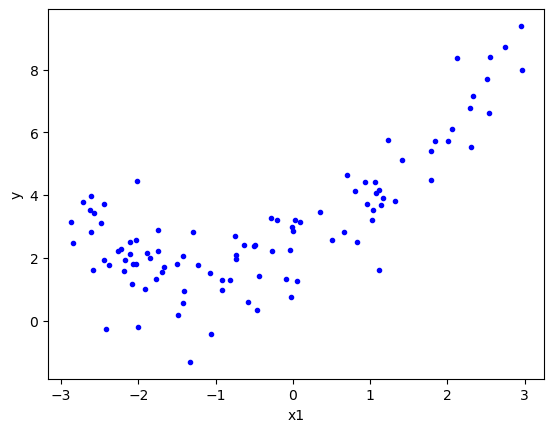

In [693]:
def plot_data(x, y):
    plt.plot(X, y, "b.")
    plt.ylabel('y')
    plt.xlabel('x1')


plot_data(X, y)

In [694]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

print(X[3])
print(X_poly[0])

#  X_poly now contains the original feature of X plus the square of this feature. Now you
#  can fit a LinearRegression model to this extended training data

[-1.77308361]
[-1.90696617  3.63651996]


In [695]:
lin_req = LinearRegression()
lin_req.fit(X_poly, y)

print(lin_req.intercept_)
print(lin_req.coef_)


#  y = 0.5x^2 + 1.0x + 2.0 + Gaussian noise
# predicted -> y = 0.48x^2 + 1.05x + 1.9 
# which is close.

[2.18155425]
[[1.02210153 0.44708807]]


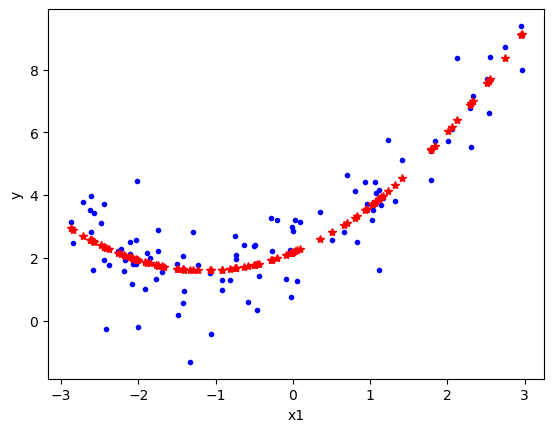

In [696]:
plt.plot(X, y, "b.")

plt.ylabel('y')
plt.xlabel('x1')

y_poly_predict = []
# val = X_b[1]
# print(val)
# lin_req.predict([val])
for index in range(len(X_b)):
    predict = lin_req.predict([[X[index][0], (X[index][0])**2]])
    y_poly_predict.append(predict[0][0])
    # print(predict[0][0])





plt.plot(X, y_poly_predict, "r*")

##### Learning Curves

 If you perform high-degree Polynomial Regression, you will likely fit the training
 data much better than with plain Linear Regression. However, its likely that higher-degree polynomial can overfit. 

In [697]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val =  train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        # print(m)
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.ylabel("RMSE")
    plt.xlabel("Training set size")

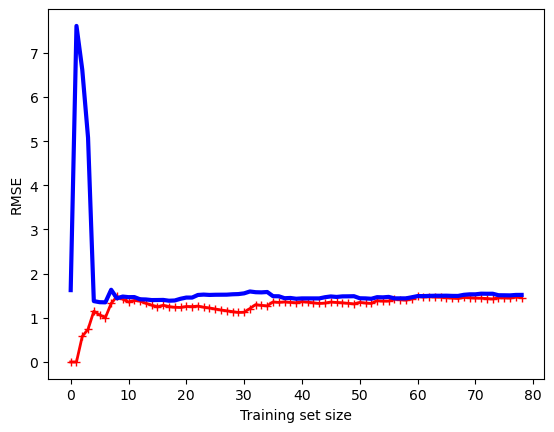

In [698]:
lin_req = LinearRegression()
plot_learning_curves(lin_req, X, y)


# First, let’s look at the performance on the training data: when there are just one or two instances in the training set, the model can fit them perfectly, which is why the curve starts at zero. But as
# new instances are added to the training set, it becomes impossible for the model to fit the training data perfectly, both because the data is noisy and because it is not linear
# at all. So the error on the training data goes up until it reaches a plateau, at which
#  point adding new instances to the training set doesn’t make the average error much
#  better or worse. Now let’s look at the performance of the model on the validation
#  data. When the model is trained on very few training instances, it is incapable of gen
# eralizing properly, which is why the validation error is initially quite big.
# Then, as the model is shown more training examples, it learns, and thus the validation error
#  slowly goes down. However, once again a straight line cannot do a good job modeling
#  the data, so the error ends up at a plateau, very close to the other curve.

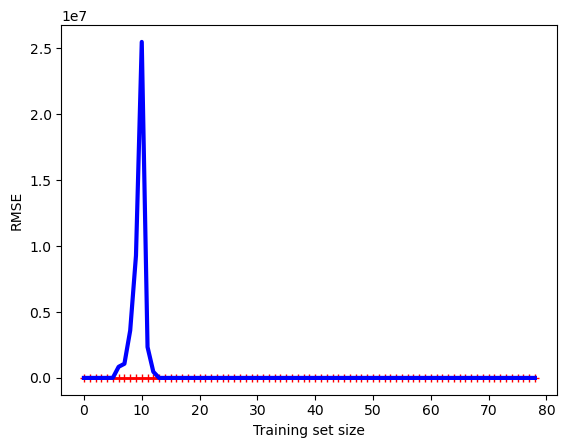

In [699]:
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_req", LinearRegression())
])


plot_learning_curves(polynomial_regression, X, y)

# These learning curves look a bit like the previous ones, but there are two very impor
# tant differences:
#  • The error on the training data is much lower than with the Linear Regression
#  model.

# There is a gap between the curves. This means that the model performs signifi
# cantly better on the training data than on the validation data, which is the hall
# mark of an overfitting model. If you used a much larger training set, however, the
#  two curves would continue to get closer.

# One way to improve an overfitting model is to feed it more training
#  data until the validation error reaches the training error.

In [700]:
# An important theoretical result of statistics and Machine Learning is the fact that a
# model’s generalization error can be expressed as the sum of three very different errors:
# Bias
# --------
# This part of the generalization error is due to wrong assumptions, such as assuming that the data is linear when it is actually quadratic. A high-bias model is most
# likely to underfit the training data

# Variance
# -------
#  This part is due to the model’s excessive sensitivity to small variations in the
#  training data. A model with many degrees of freedom (such as a high-degree polynomial model) is likely to have high variance and thus overfit the training data.

#  Irreducible error
# ------------------
#  This part is due to the noisiness of the data itself. The only way to reduce this
#  part of the error is to clean up the data (e.g., fix the data sources, such as broken
#  sensors, or detect and remove outliers).
#  Increasing a model’s complexity will typically increase its variance and reduce its bias.
#  Conversely, reducing a model’s complexity increases its bias and reduces its variance.
#  This is why it is called a trade-off

#### Regularized Linear Models

 A simple way to regularize a polynomial model is to reducethe number of polynomial degrees

For a linear model, regularization is typically achieved by constraining the weights of the model. We now consider the Ridge Regression, Lasso Regression, and Elastic Net,
which implement three different ways to constrain the weights.

##### Ridge Regression

This adds ℓ2 norm of the weight vector (regularization term) to the cost function. 

In [701]:
ridge_ridge = Ridge(alpha=1, solver='cholesky')

ridge_ridge.fit(X, y)
ridge_ridge.predict([[1.5]])

array([[4.7995057]])

In [702]:
## using stochastic gradient descent

sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])


# The penalty hyperparameter sets the type of regularization term to use. Specifying
#  "l2" indicates that you want SGD to add a regularization term to the cost function
#  equal to half the square of the ℓ2
#  norm of the weight vector: this is simply Ridge
#  Regression.


array([4.77970734])

##### Lasso Regression

This adds ℓ1 norm of the weight vector (regularization term) to the cost function. 

In [703]:
sgd_reg = Lasso(alpha=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])


# you can also use SGDRegressor  with penalty=l1


array([4.73589025])

##### Elastic Net 


 Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The
 regularization term is a simple mix of both Ridge and Lasso’s regularization terms,
 and you can control the mix ratio r. When r = 0, Elastic Net is equivalent to Ridge
 Regression, and when r = 1, it is equivalent to Lasso Regression 

So when should you use plain Linear Regression (i.e., without any regularization),
 Ridge, Lasso, or Elastic Net? It is almost always preferable to have at least a little bit of
 regularization, so generally you should avoid plain Linear Regression. Ridge is a good
 default, but if you suspect that only a few features are useful, you should prefer Lasso
 or Elastic Net because they tend to reduce the useless features’ weights down to zero,

In [704]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.74020471])

#### Early Stopping

 A very different way to regularize iterative learning algorithms such as Gradient
 Descent is to stop training as soon as the validation error reaches a minimum. T

In [705]:
class AbsoluteVals:
    def __init__(self):  # no *args or **kargs
        pass

    def fit(self, X, y=None):
        return self  # nothing else to do

    def transform(self, X):
        return X.ravel()

In [706]:
poly_scaler = Pipeline([
 ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
 ("std_scaler", StandardScaler()),
#  ('abs', AbsoluteVals())
 ])

In [707]:
X_train, X_val, y_train, y_val =  train_test_split(X, y, test_size=0.2)
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

In [708]:
# [print(i) for i in X_val_poly_scaled.ravel() if  i <= 0]
y_val =  y_val.ravel()
y_train = y_train.ravel()

In [709]:
sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True,
 penalty=None, learning_rate="constant", eta0=0.0005)

In [710]:
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)